#Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import nltk
import re

In [ ]:
#Download the dataset
!wget https://raw.githubusercontent.com/aadityadamle/Machine_Learning/main/final_project/train.csv
!wget https://raw.githubusercontent.com/aadityadamle/Machine_Learning/main/final_project/test.csv

--2022-08-10 17:29:07--  https://raw.githubusercontent.com/aadityadamle/Machine_Learning/main/final_project/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987712 (965K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>] 964.56K  --.-KB/s    in 0.008s  

2022-08-10 17:29:08 (117 MB/s) - ‘train.csv.1’ saved [987712/987712]

--2022-08-10 17:29:08--  https://raw.githubusercontent.com/aadityadamle/Machine_Learning/main/final_project/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4

In [ ]:
#Create dataframe
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
#Examine data
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
#Remove id column
train = train.iloc[:,1:]
train

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
#check for null
train.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
#remove na values 
train = train.dropna()
train

,keyword,location,text,target
31,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...
7575,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


0    2884
1    2196
Name: target, dtype: int64


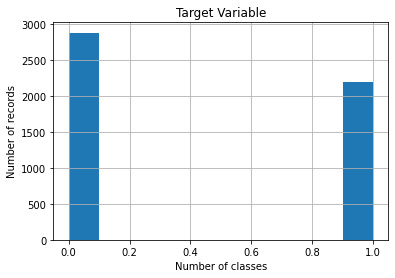

In [ ]:
#Target variable
classes = train.iloc[:,-1]
print(classes.value_counts())

#visualize
classes.hist()
plt.xlabel("Number of classes")
plt.ylabel("Number of records")
plt.title("Target Variable")
plt.show()

#Pre-processing of text

In [ ]:
#make a series of all tweets
tweets = train["text"]
tweets

31      @bbcmtd Wholesale Markets ablaze http://t.co/l...
32      We always try to bring the heavy. #metal #RT h...
33      #AFRICANBAZE: Breaking news:Nigeria flag set a...
34                     Crying out for more! Set me ablaze
35      On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
                              ...                        
7575    On the bright side I wrecked http://t.co/uEa0t...
7577    @widda16 ... He's gone. You can relax. I thoug...
7579    Three days off from work and they've pretty mu...
7580    #FX #forex #trading Cramer: Iger's 3 words tha...
7581    @engineshed Great atmosphere at the British Li...
Name: text, Length: 5080, dtype: object

In [ ]:
#remove hyperlinks
tweets = tweets.str.replace(r'http\S+', ' ')
tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


31                     @bbcmtd Wholesale Markets ablaze  
32         We always try to bring the heavy. #metal #RT  
33      #AFRICANBAZE: Breaking news:Nigeria flag set a...
34                     Crying out for more! Set me ablaze
35      On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
                              ...                        
7575                       On the bright side I wrecked  
7577    @widda16 ... He's gone. You can relax. I thoug...
7579    Three days off from work and they've pretty mu...
7580    #FX #forex #trading Cramer: Iger's 3 words tha...
7581    @engineshed Great atmosphere at the British Li...
Name: text, Length: 5080, dtype: object

In [ ]:
#remove punctuations
tweets = tweets.str.replace(r'[^\w\d\s]',' ')
tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


31                      bbcmtd Wholesale Markets ablaze  
32         We always try to bring the heavy   metal  RT  
33       AFRICANBAZE  Breaking news Nigeria flag set a...
34                     Crying out for more  Set me ablaze
35      On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
                              ...                        
7575                       On the bright side I wrecked  
7577     widda16     He s gone  You can relax  I thoug...
7579    Three days off from work and they ve pretty mu...
7580     FX  forex  trading Cramer  Iger s 3 words tha...
7581     engineshed Great atmosphere at the British Li...
Name: text, Length: 5080, dtype: object

In [ ]:
#lower text
tweets = tweets.str.lower()
tweets

31                      bbcmtd wholesale markets ablaze  
32         we always try to bring the heavy   metal  rt  
33       africanbaze  breaking news nigeria flag set a...
34                     crying out for more  set me ablaze
35      on plus side look at the sky last night it was...
                              ...                        
7575                       on the bright side i wrecked  
7577     widda16     he s gone  you can relax  i thoug...
7579    three days off from work and they ve pretty mu...
7580     fx  forex  trading cramer  iger s 3 words tha...
7581     engineshed great atmosphere at the british li...
Name: text, Length: 5080, dtype: object

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
#removing common words
tweets = tweets.apply(lambda x: " ".join(word for word in x.split()
                                          if word not in stop_words))
tweets

31                        bbcmtd wholesale markets ablaze
32                        always try bring heavy metal rt
33      africanbaze breaking news nigeria flag set abl...
34                                      crying set ablaze
35                   plus side look sky last night ablaze
                              ...                        
7575                                  bright side wrecked
7577    widda16 gone relax thought wife wrecked cake g...
7579    three days work pretty much wrecked hahaha sho...
7580    fx forex trading cramer iger 3 words wrecked d...
7581    engineshed great atmosphere british lion gig t...
Name: text, Length: 5080, dtype: object

In [ ]:
#Remove affixes to give stems using Porter Stemmer
ps = nltk.PorterStemmer()
tweets = tweets.apply(lambda x: ' '.join(ps.stem(word)
                      for word in x.split()))
tweets

31                           bbcmtd wholesal market ablaz
32                         alway tri bring heavi metal rt
33       africanbaz break news nigeria flag set ablaz aba
34                                          cri set ablaz
35                     plu side look sky last night ablaz
                              ...                        
7575                                    bright side wreck
7577    widda16 gone relax thought wife wreck cake gon...
7579    three day work pretti much wreck hahaha shouto...
7580    fx forex trade cramer iger 3 word wreck disney...
7581    enginesh great atmospher british lion gig toni...
Name: text, Length: 5080, dtype: object

#Feature Generation

In [ ]:
#Generating features
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()  

In [ ]:
#learn all the tweets and transform into vectors
X = vect.fit_transform(tweets)

In [ ]:
print(vect.get_feature_names())

['00', '000', '0000', '00pm', '01', '02', '0215', '02pm', '03', '030', '034', '04', '05', '05th', '06', '060', '061', '06jst', '07', '08', '087809233445', '0880', '09', '10', '100', '1000', '10000', '100bn', '100mb', '100nd', '101', '1028', '103', '105', '106', '1061thetwist', '107', '109', '10k', '10m', '10new', '10pm', '10th', '10x', '11', '11000', '11000000', '114', '1141', '115', '119000', '11am', '12', '1200', '12000', '120000', '1200000', '1236', '124', '125', '129', '12am', '12hr', '12jst', '12m', '12pm', '12th', '12u', '12v', '13', '130', '13000', '133', '138', '139055', '13pm', '14', '140', '14000', '149', '14th', '15', '150', '159', '15901', '15km', '15moferadio', '15pm', '15th', '16', '160', '1600', '1620', '163', '16550', '166', '16yr', '17', '1700', '17000', '1716', '17th', '18', '180', '1800', '1843', '1862', '1880', '1890', '18jst', '18th', '18w', '19', '1921', '1935', '1942', '1943', '1945', '1952', '1960', '1965', '1967', '1974', '1976', '1979', '198', '1980', '1984', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(len(vect.get_feature_names()))

10883


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y = train["target"]
print(y)

31      1
32      0
33      1
34      0
35      0
       ..
7575    0
7577    0
7579    0
7580    0
7581    0
Name: target, Length: 5080, dtype: int64


#Model Training

In [ ]:
#Splitting data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1) 

In [ ]:
#Using LinearSVC 
from sklearn.svm import SVC
cls = SVC(kernel = "linear")

In [ ]:
cls.fit(X_train, y_train)

SVC(kernel='linear')

#Model Testing

In [ ]:
prediction = cls.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("LinearSVC Accuracy Score is ",accuracy_score(prediction, y_test)*100)

LinearSVC Accuracy Score is  81.49606299212599


In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, prediction),
    index = [['actual', 'actual'], ['Not a Disaster', 'Disaster']],
    columns = [['predicted', 'predicted'], ['Not a Disaster', 'Disaster']])

predicted         
                      Not a Disaster Disaster
actual Not a Disaster            247       53
       Disaster                   41      167

#Testing on unknown data

In [ ]:
#Examine test data
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
#Remove id column
test = test.iloc[:,1:]
test

,keyword,location,text
0,NaN,NaN,Just happened a terrible car crash
1,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
#generate features from tweets in testing data
test_tweets = test["text"]
test_tweets

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [ ]:
#remove hyperlinks
test_tweets = test_tweets.str.replace(r'http\S+', ' ')
#remove punctuations
test_tweets = test_tweets.str.replace(r'[^\w\d\s]',' ')
#lower text
test_tweets = test_tweets.str.lower()
#removing common words
test_tweets = test_tweets.apply(lambda x: " ".join(word for word in x.split()
                                          if word not in stop_words))
#Remove affixes to give stems using Porter Stemmer
test_tweets = test_tweets.apply(lambda x: ' '.join(ps.stem(word)
                      for word in x.split()))
test_tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0                                happen terribl car crash
1           heard earthquak differ citi stay safe everyon
2       forest fire spot pond gees flee across street ...
3                          apocalyps light spokan wildfir
4                   typhoon soudelor kill 28 china taiwan
                              ...                        
3258      earthquak safeti lo angel ûò safeti fasten xrwn
3259    storm ri wors last hurrican citi amp 3other ha...
3260                            green line derail chicago
3261                  meg issu hazard weather outlook hwo
3262      cityofcalgari activ municip emerg plan yycstorm
Name: text, Length: 3263, dtype: object

In [ ]:
#apply the learning on train set test_tweets and transform into test_vectors(tX)
tX = vect.transform(test_tweets)
print(vect.get_feature_names_out())
print(len(vect.get_feature_names()))

['00' '000' '0000' ... 'ûó' 'ûóher' 'ûóneglig']
10883


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tX.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
testing_prediction = cls.predict(tX)

In [ ]:
testing_prediction

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
test['testing_prediction'] = testing_prediction.tolist()
test

,keyword,location,text,testing_prediction
0,NaN,NaN,Just happened a terrible car crash,0
1,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...
3258,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


#References

http://education.abcom.com/fake-news-classifier/